In [90]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head().transpose()


,0,1,2,3,4
survived,0,1,1,1,0
pclass,3,1,3,1,3
sex,male,female,female,female,male
age,22.0,38.0,26.0,35.0,35.0
sibsp,1,1,0,1,0
parch,0,0,0,0,0
fare,7.25,71.2833,7.925,53.1,8.05
embarked,S,C,S,S,S
class,Third,First,Third,First,Third
who,man,woman,woman,woman,man


In [89]:
titanic.info()
titanic['survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count
survived,
0,549
1,342


In [91]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


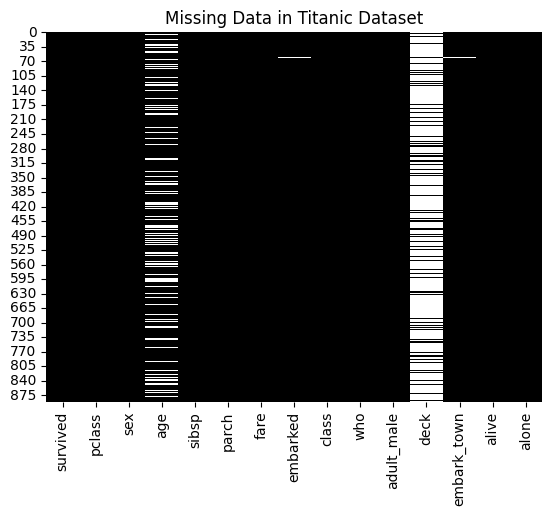

In [92]:
#This defines the color scheme for the heatmap.

#'black' will represent missing values (True)

#'white' will represent non-missing values (False)
Colormap=['black','white']
sns.heatmap(
    titanic.isnull(),  # a DataFrame of True/False for missing values
    cmap=Colormap,      # use the black/white color map
    cbar=False            # hide the color bar legend
).set_title('Missing Data in Titanic Dataset')
plt.savefig("Missing Data in Titanic Dataset.png", dpi=300, bbox_inches='tight')

In [93]:
titanic_clean=titanic.drop(['age','deck'],axis=1)
titanic_dropna=titanic_clean.dropna(subset=['embarked', 'embark_town'])
titanic_dropna.isnull().sum()


,0
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0
adult_male,0


In [94]:
titanic_dropna['survived'].value_counts()

,count
survived,
0,549
1,340


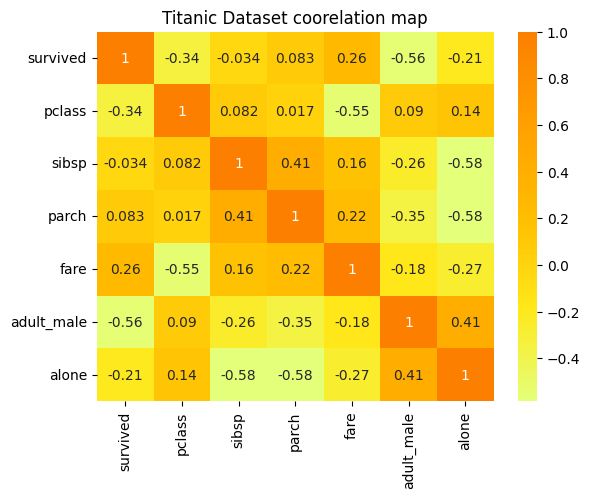

In [95]:
sns.heatmap(
    titanic_dropna.corr(numeric_only=True),
    # titanic_dropna.select_dtypes(include='number').corr(),
    cmap="Wistia",
    annot=True

).set_title("Titanic Dataset coorelation map")
plt.savefig("correlation_map.png", dpi=300, bbox_inches='tight')

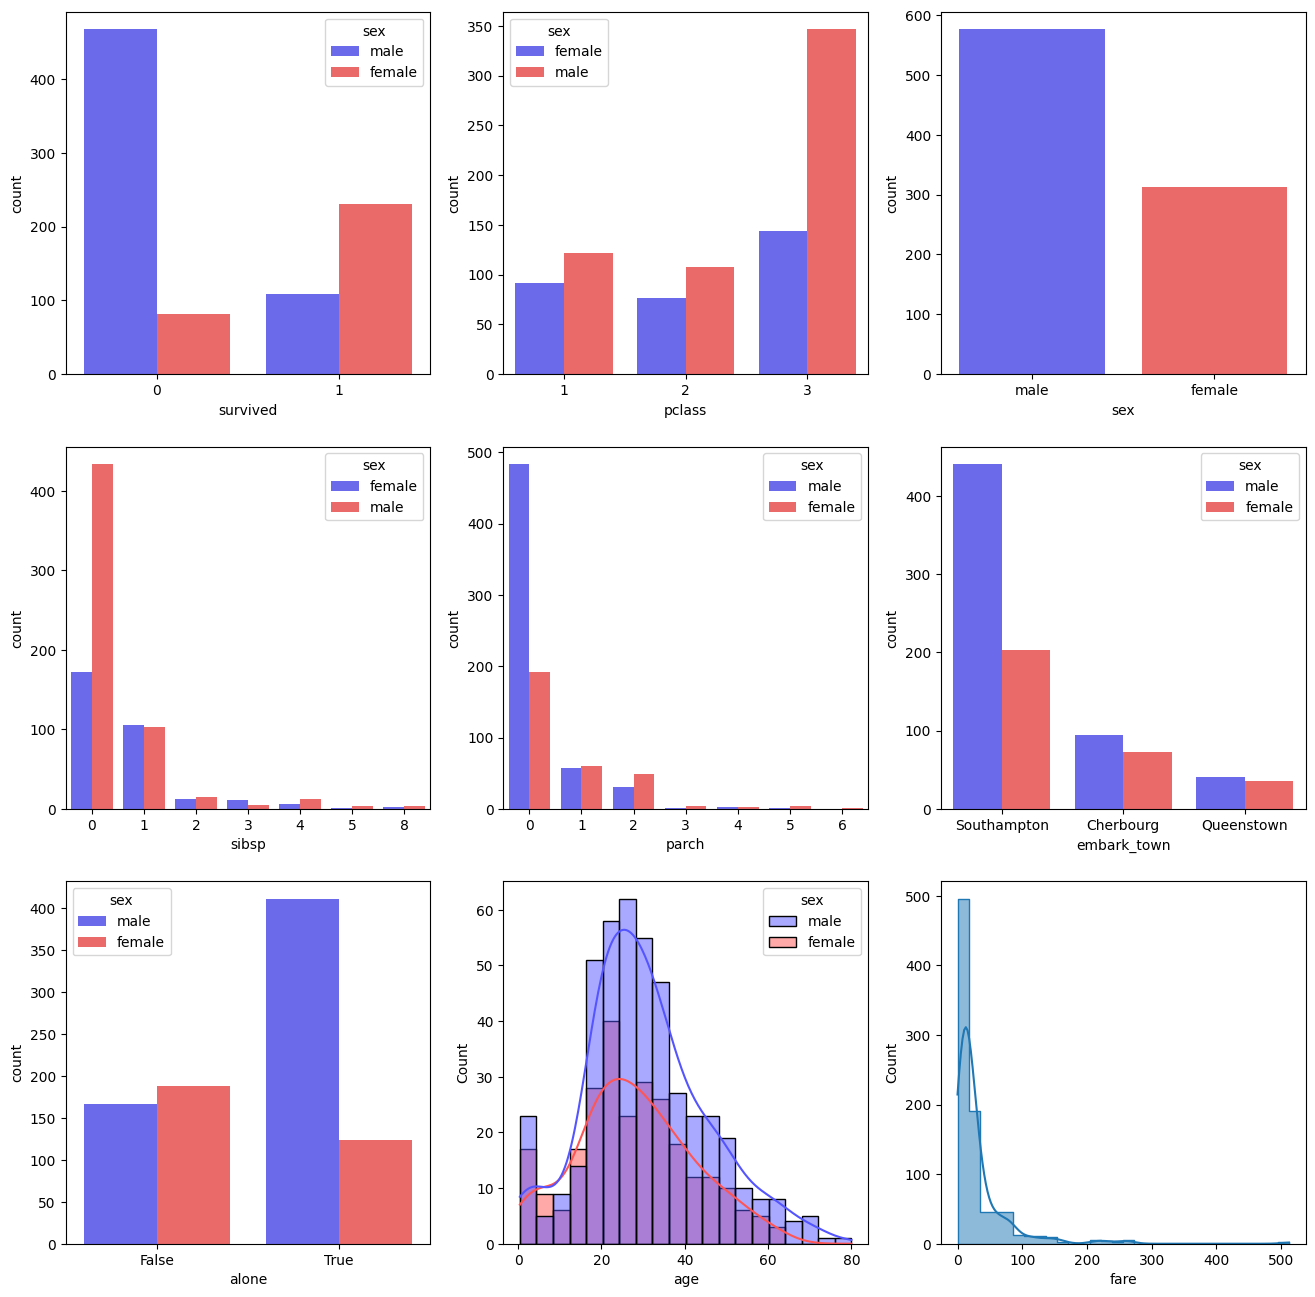

In [96]:
fig,ax=plt.subplots(3,3,figsize=(16,16))
sns.countplot(data=titanic_dropna,
    x='survived',
    hue='sex',
    palette='seismic',
    ax=ax[0,0]
)


sns.countplot(
    data=titanic_dropna,
    x='pclass',
    hue='sex',
    palette='seismic',
    ax=ax[0,1]
)

sns.countplot(
    data=titanic_dropna,
    x='sex',
    hue='sex',
    palette='seismic',
    ax=ax[0,2]
)

sns.countplot(
    data=titanic_dropna,
    x='sibsp',
    hue='sex',
    palette='seismic',
    ax=ax[1,0]
)

sns.countplot(
    data=titanic_dropna,
    x='parch',
    hue='sex',
    palette='seismic',
    ax=ax[1,1]
)

sns.countplot(
    data=titanic_dropna,
    x='embark_town',
    hue='sex',
    palette='seismic',
    ax=ax[1,2]
)

sns.countplot(
    data=titanic_dropna,
    x='alone',
    hue='sex',
    palette='seismic',
    ax=ax[2,0]
)

sns.histplot(
    data=titanic,
    kde=True,
    x='age',
    hue='sex',
    palette='seismic',
    ax=ax[2,1]
)

# numeric plots
sns.histplot(
    titanic_dropna['fare'],
    bins=30,
    element='step',
    kde=True,
    ax=ax[2][2]

)

plt.savefig('Bivariant_plots.png', bbox_inches='tight')
plt.show()

In [101]:

titanic_dropna['survived'].value_counts()



,count
survived,
Died,549
Survived,340


In [100]:
titanic_dropna['survived'] = titanic_dropna['survived'].replace({0: 'Died', 1: 'Survived'})

/tmp/ipython-input-100-3956526568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_dropna['survived'] = titanic_dropna['survived'].replace({0: 'Died', 1: 'Survived'})


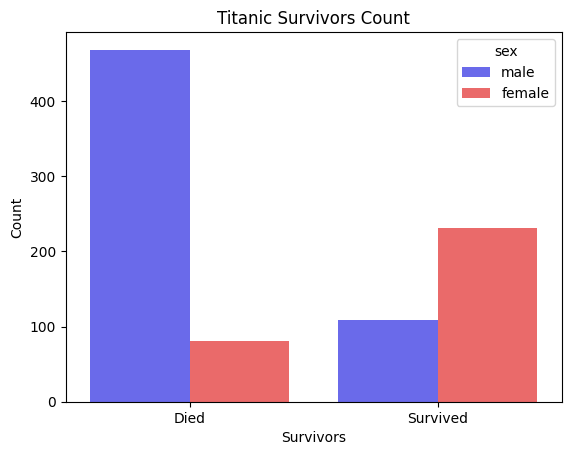

In [104]:
sns.countplot(
    data=titanic_dropna,
    x='survived',
    hue='sex',
    palette='seismic'
)

plt.title('Titanic Survivors Count')
plt.xlabel('Survivors')
plt.ylabel('Count')

plt.savefig('Titanic_Dataset_Exploration_03.jpeg', bbox_inches='tight')


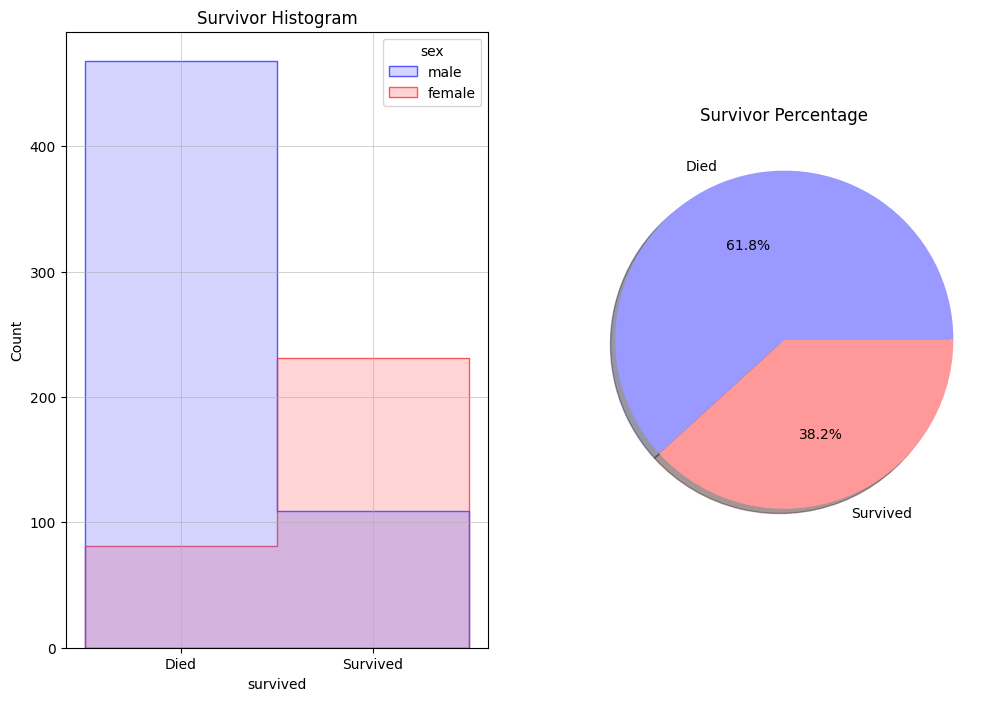

In [138]:
pie_labels = ['Died', 'Survived']
colors = plt.get_cmap('seismic')(np.linspace(0.4, 0.6, 2))

fig,axes=plt.subplots(1,2,figsize=(12,8))

sns.histplot(data=titanic_dropna,
             x='survived',bins=25,
             hue='sex',element='step',
            ax=axes[0],
             palette='seismic')

axes[0].set_title('Survivor Histogram')

axes[0].grid(linewidth=0.4)
axes[1].pie(titanic_dropna['survived'].value_counts(),
        autopct='%1.1f%%',
        labels=pie_labels,
        colors =colors,
        shadow=True,

       )

axes[1].set_title('Survivor Percentage')
plt.show()

In [139]:
titanic_dropna['pclass'].value_counts()

,count
pclass,
3,491
1,214
2,184


In [143]:
titanic_dropna.groupby(['survived', 'sex','pclass'])['survived'].count()

survived  sex     pclass
Died      female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
Survived  female  1          89
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: survived, dtype: int64

Text(0, 0.5, 'Count')

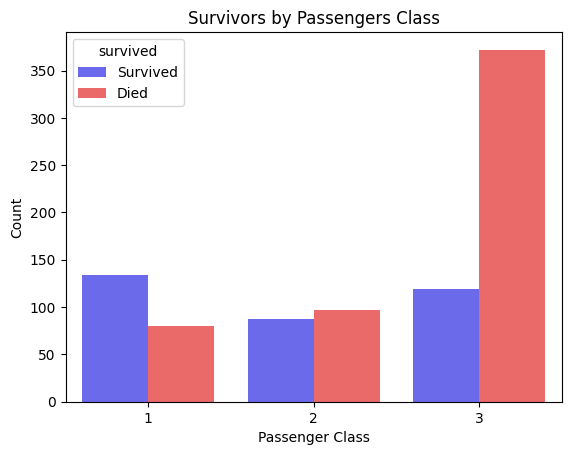

In [144]:
sns.countplot(
    data=titanic_dropna,
    x='pclass',
    hue='survived',
    palette='seismic'
)

plt.title('Survivors by Passengers Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

In [146]:
titanic_first_class = titanic_dropna[titanic_dropna['pclass'] == 1]
titanic_second_class = titanic_dropna[titanic_dropna['pclass'] == 2]
titanic_third_class = titanic_dropna[titanic_dropna['pclass'] == 3]

Text(0.5, 1.0, 'Third Class')

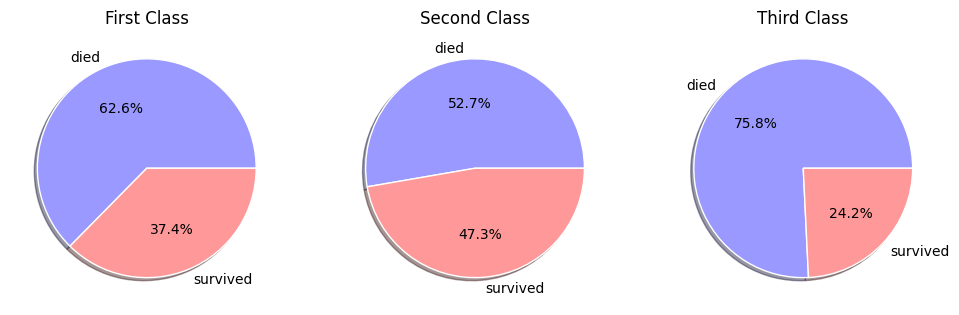

In [150]:
colors=plt.get_cmap('seismic')(np.linspace(0.4,0.6,2))
pie_labels= ["died", 'survived']
ig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,4))
fig.suptitle('Survivor Percentage')

axes[0].pie(
    titanic_first_class['survived'].value_counts(),
    autopct='%1.1f%%',
    pctdistance=0.6,
    labels = pie_labels,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    shadow=True,
)
axes[0].set_title('First Class')

axes[1].pie(
    titanic_second_class['survived'].value_counts(),
    autopct='%1.1f%%',
    pctdistance=0.6,
    labels = pie_labels,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    shadow=True,
)
axes[1].set_title('Second Class')

axes[2].pie(
    titanic_third_class['survived'].value_counts(),
    autopct='%1.1f%%',
    pctdistance=0.6,
    labels = pie_labels,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    shadow=True,
)
axes[2].set_title('Third Class')


/tmp/ipython-input-162-1148651624.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


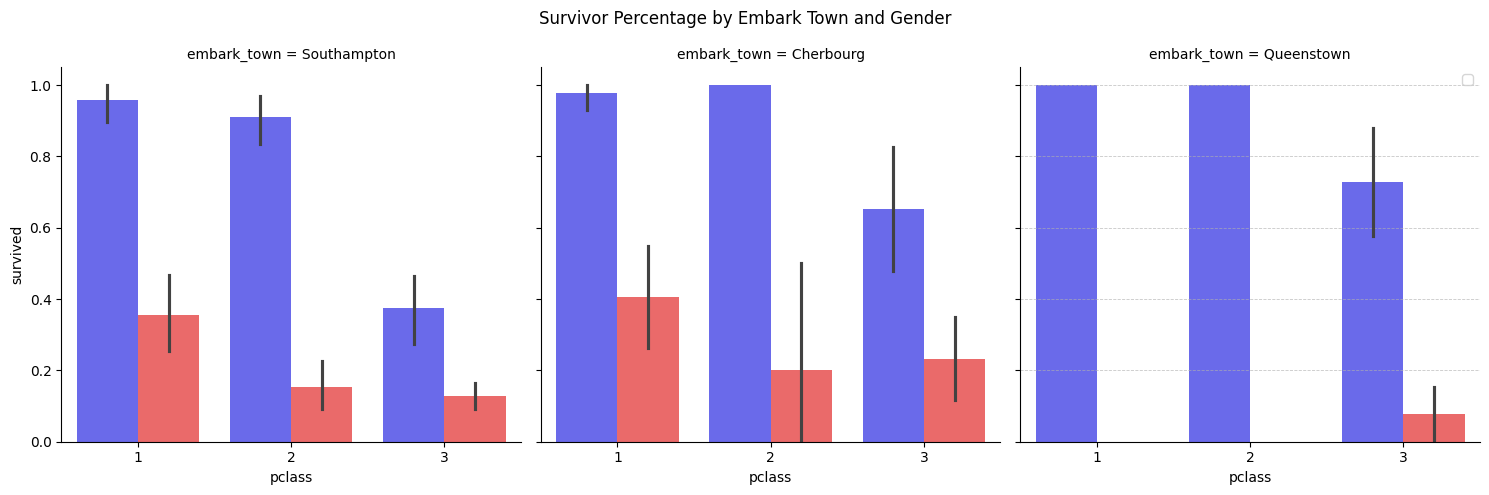

In [162]:
sns.catplot(
    data=titanic,
    x='pclass',
    y='survived',
    kind='bar',
    col='embark_town',
    orient='v',
    hue='sex',
    palette='seismic',
    legend=False
)
plt.grid(True, axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.suptitle('Survivor Percentage by Embark Town and Gender')
plt.tight_layout()
plt.legend(loc='upper right')

Text(0, 0.5, 'Count')

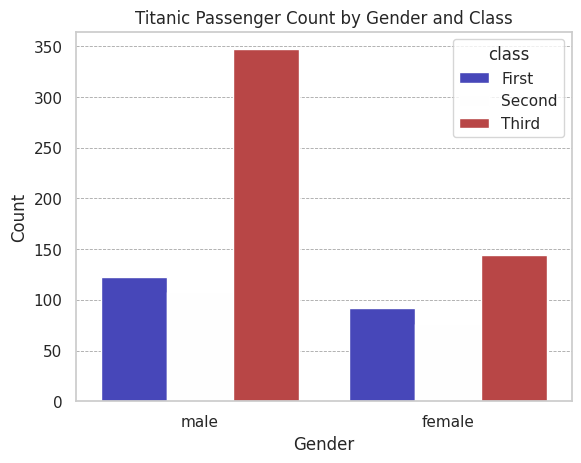

In [166]:
sns.set_theme(style='whitegrid')
sns.countplot(
    data=titanic_dropna,
    x='sex',
    hue='class',
    palette='seismic',
    saturation=0.45,
)
plt.grid(True, axis='y', linestyle='--', linewidth=0.6, alpha=0.7,color='gray')
plt.title('Titanic Passenger Count by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Count')



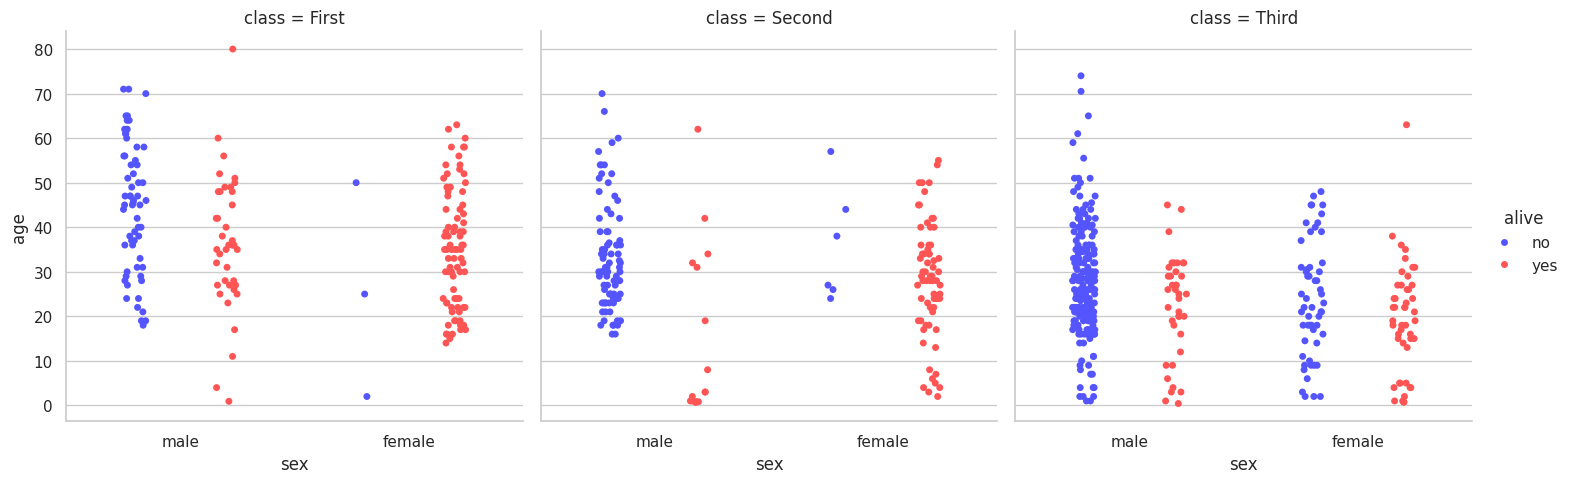

In [171]:
sns.catplot(
    data=titanic,
    x='sex',
    y='age',
    hue='alive',
    palette='seismic',
    col='class',
    dodge = True,
    legend=True
)